# Задание 1.

Используя геометрические интерпретации, решить следующие экстремальные задачи:
1. $\text{extr}\left(\left|x_1\right|^\lambda + 2 \left|x_2\right|^\lambda \right)$ при условии $x_1^2 + 4x_2^2 = 4, \;\; \lambda \neq 0$
2. $\text{extr}\left(x_1^2 + 4x_2^2\right)$ при условии $\left|x_1\right|^\lambda + 2 \left|x_2\right|^\lambda \le 1, \;\; \lambda \neq 0$
3. $\text{extr}\left(x_1^2 + 4x_2^2\right)$ при условии $\left|x_1\right|^\lambda + 2 \left|x_2\right|^\lambda = 1, \;\; \lambda \neq 0$

1.Сразу заметим, что при $\lambda < 0$ у исследуемой функции есть особенности, когда хотя бы одна из координат -- 0. Можно сразу сказать, что при стремлении к $(0, 1), (0, -1), (2, 0), (-2, 0)$ функция будет стремиться к максимуму. В остальных же точках она дважды непрерывно дифференцируема (модуль тоже не обнуляется), так что можно воспользоваться методом множителей Лагранжа:

$L = |x_1|^\lambda + 2|x_2|^\lambda + \mu(x_1^2 + 4x_2^2 - 4)$

$\begin{cases}
    \lambda|x_1|^{\lambda-1} \mathbf{sgn} \, x_1 + 2\mu x_1 = 0\\
    2\lambda|x_2|^{\lambda-1} \mathbf{sgn} \, x_2 + 8\mu x_2 = 0\\
    x_1^2 + 4x_2^2 = 4
\end{cases}$

$\begin{cases}
    \lambda|x_1|^{\lambda-1} + 2\mu |x_1| = 0\\
    2\lambda|x_2|^{\lambda-1}+ 8\mu |x_2| = 0\\
    x_1^2 + 4x_2^2 = 4
\end{cases}$

При $x_1 = 0$ получаем $x_2 = \pm 1$, а при $x_2 = 0$ получаем $x_1 = \pm 2$. Если $x_1 \not = 0$, то $\mu$ выражается из первого уравнения. Затем это необходимо подставить в квадртичную форму второго дифференциала и определить, в каких из точек он знакоопределён.

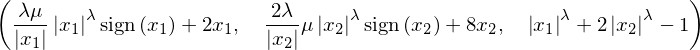

In [16]:
import sympy as sp

sp.init_printing()
x_1, x_2, l, m = sp.symbols("x_1 x_2 \lambda \mu", real=True)

F = x_1**2 + 4*x_2**2
C = sp.Abs(x_1)**l + 2*sp.Abs(x_2)**l - 1

L = F + m*C

Lx_1 = sp.diff(L, x_1)
Lx_2 = sp.diff(L, x_2)
Lm   = sp.diff(L, m)

m_s = sp.solve(Lx_1, m)[0]

Lx_1, Lx_2, Lm


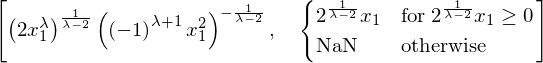

In [31]:
sp.solve(Lx_2.subs(m, m_s), x_2)

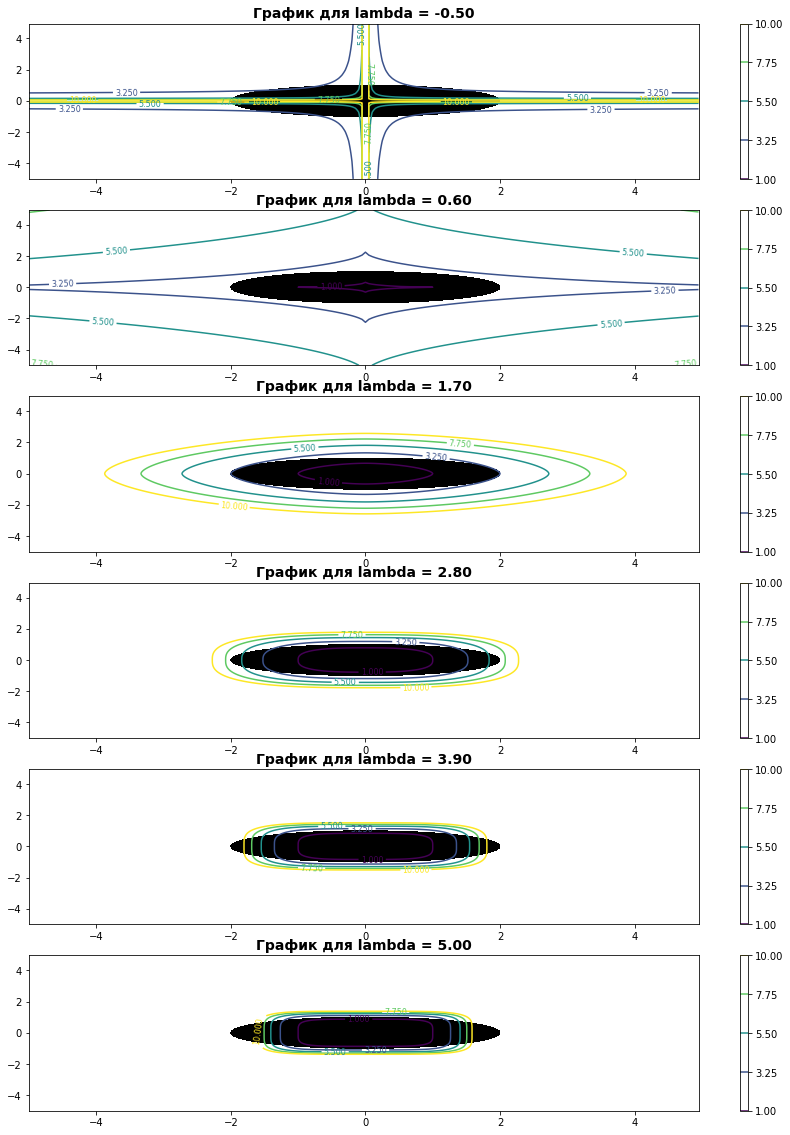

In [58]:
import numpy as np
import matplotlib.pyplot as plt

min_l = -0.5
max_l = 5
fig = plt.figure(figsize=(15,20))
delta = 0.05
x_1 = np.arange(-5.0, 5.0, delta)
x_2 = np.arange(-5.0, 5.0, delta)
X_1, X_2 = np.meshgrid(x_1, x_2)

F = X_1**2 + 4*X_2**2 - 4
axs = {}
i_range = 6
ls = np.linspace(min_l, max_l, i_range)
for i in range(i_range):
    axs[i] = fig.add_subplot(i_range, 1, i+1)
    E = abs(X_1)**ls[i] + 2*abs(X_2)**ls[i]
    CS = axs[i].contour(X_1, X_2, E, np.linspace(1, 10, 5))
    axs[i].contourf(X_1,X_2,F,[-4, 0], colors = 'k')
    plt.clabel(CS, inline=1, fontsize=8)
    cbar = plt.colorbar(CS)
    plt.title('График для lambda = %.2f' % ls[i], fontsize=14, fontweight='bold')

plt.show()

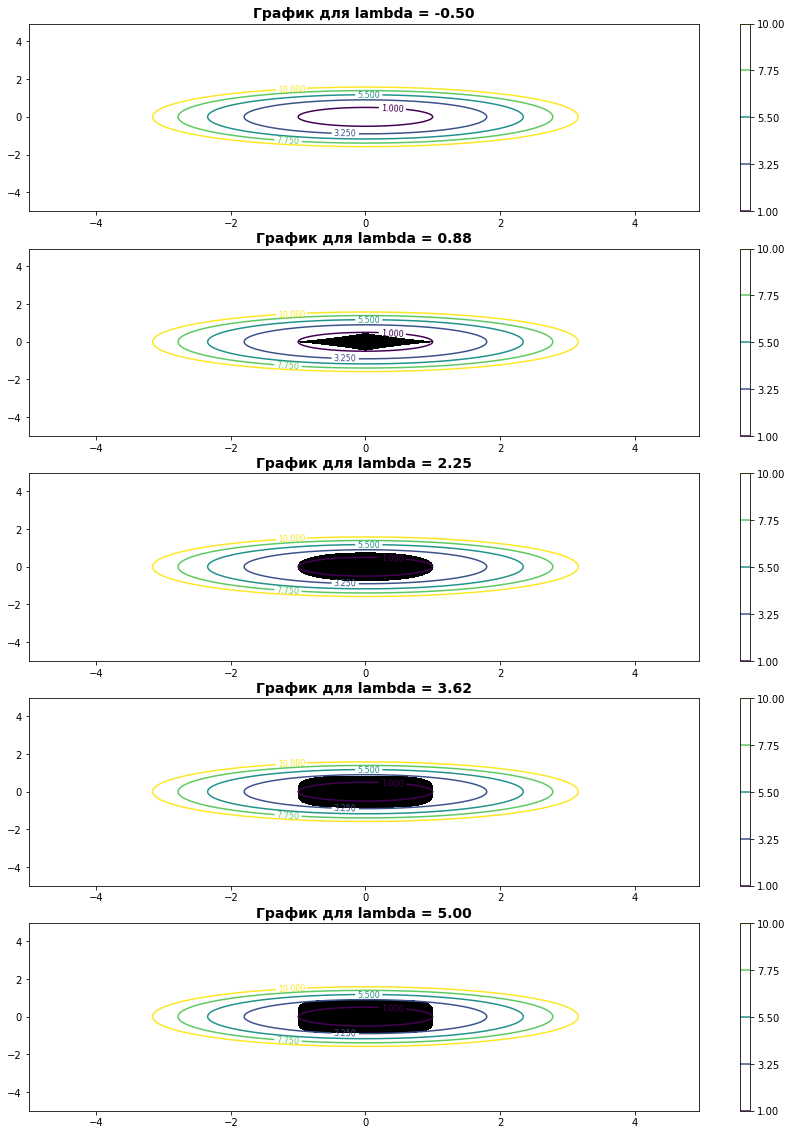

In [54]:
import numpy as np
import matplotlib.pyplot as plt

min_l = -0.5
max_l = 5
fig = plt.figure(figsize=(15,20))
delta = 0.05
x_1 = np.arange(-5.0, 5.0, delta)
x_2 = np.arange(-5.0, 5.0, delta)
X_1, X_2 = np.meshgrid(x_1, x_2)

F = X_1**2 + 4*X_2**2
axs = {}
i_range = 5
ls = np.linspace(min_l, max_l, i_range)
for i in range(i_range):
    axs[i] = fig.add_subplot(i_range, 1, i+1)
    E = abs(X_1)**ls[i] + 2*abs(X_2)**ls[i] - 1
    CS = axs[i].contour(X_1, X_2, F, np.linspace(1, 10, 5))
    axs[i].contourf(X_1, X_2, E, [-1, 0], colors = 'k')
    plt.clabel(CS, inline=1, fontsize=8)
    cbar = plt.colorbar(CS)
    plt.title('График для lambda = %.2f' % ls[i], fontsize=14, fontweight='bold')

plt.show()

Можно сразу сказать, что если мы работаем внутри области, то в точке $(0, 0)$ достигается минимум функции. Максимумы же находятся из пересечения линий наибольшего уровня с бюджетным множеством.